# Detailed Analysis of the patents referencing the Fraunhofer publications

This tutorial shows how to extract and analyse patents information linked to a selected research organization, using the Dimensions Analytics API and [GRID](https://grid.ac/). 

## Load libraries and log in

In [1]:
# @markdown # Get the API library and login 
# @markdown **Privacy tip**: leave the password blank and you'll be asked for it later. This can be handy on shared computers.
username = ""  #@param {type: "string"}
password = ""  #@param {type: "string"}
endpoint = "https://app.dimensions.ai"  #@param {type: "string"}


# INSTALL/LOAD LIBRARIES 
# ps optimized for Google Colab /modify installation as needed based on your environment
# 
print("==\nInstalling libraries..")
!pip install dimcli plotly_express -U --quiet 

import os
import sys
import time
import json
import pandas as pd
from pandas.io.json import json_normalize
from tqdm import tqdm_notebook as progressbar
import plotly_express as px
import dimcli 
from dimcli.shortcuts import *

# AUTHENTICATION 
# https://github.com/digital-science/dimcli#authentication
#
# == Google Colab users ==
# If username/password not provided, the interactive setup assistant `dimcli --init` is invoked
#
# == Jupyter Notebook users == 
# If username/password not provided, try to use the global API credentials file.
# To create one, open a terminal (File/New/Terminal) and run `dimcli --init` from there
#  
#
print("==\nLogging in..")
if username and password:
  dimcli.login(username, password, endpoint)

if 'google.colab' in sys.modules:
  print("Environment: Google Colab")
  if username and not password:
    import getpass
    password = getpass.getpass(prompt='Password: ')     
    dimcli.login(username, password, endpoint)
  else:
    print("... launching interactive setup assistant")
    !dimcli --init    
    dimcli.login()
else:
  print("Environment: Jupyter Notebook\n... looking for API credentials file")
  dimcli.login()

dsl = dimcli.Dsl()



#
# data-saving utils 
#
DATAFOLDER = "extraction1"
if not os.path.exists(DATAFOLDER):
  !mkdir $DATAFOLDER
  print(f"==\nCreated data folder:", DATAFOLDER + "/")
#
#
def save_as_csv(df, save_name_without_extension):
    "usage: `save_as_csv(dataframe, 'filename')`"
    df.to_csv(f"{DATAFOLDER}/{save_name_without_extension}.csv", index=False)
    print("===\nSaved: ", f"{DATAFOLDER}/{save_name_without_extension}.csv")


==
Installing libraries..
==
Logging in..
Environment: Jupyter Notebook
... looking for API credentials file
DimCli v0.6.1.2 - Succesfully connected to <https://app.dimensions.ai> (method: dsl.ini file)


## Choose a Fraunhofer Research Organization

Dimensions uses GRID to identify research-related organizations, eg https://grid.ac/institutes/grid.89170.37 

In [2]:
#@markdown Please choose a specific member of the Fraunhofer Society,  then run this cell.

GRIDID = "grid.461628.f"  #@param ['Fraunhofer Institute for Laser Technology == grid.461628.f', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Production Technology == grid.461634.2', 'Fraunhofer Research Institution for Casting, Composite and Processing Technology == grid.506241.4', 'Fraunhofer Institute for Telecommunications, Heinrich Hertz Institute == grid.435231.2', 'Fraunhofer Institute for Open Communication Systems == grid.469837.7', 'Fraunhofer Institute for Production Systems and Design Technology == grid.469819.b', 'Fraunhofer Institute for Reliability and Microintegration == grid.469839.9', 'Fraunhofer Institute for Wood Research Wilhelm-Klauditz-Institut == grid.469829.8', 'Fraunhofer Institute for Surface Engineering and Thin Films == grid.462227.7', 'Fraunhofer Institute for Digital Medicine == grid.428590.2', 'Fraunhofer Institute for Manufacturing Technology and Advanced Materials == grid.461617.3', 'Fraunhofer Institute for Wind Energy Systems == grid.8440.8', 'Fraunhofer Institute for Electronic Nano Systems == grid.469847.0', 'Fraunhofer Institute for Machine Tools and Forming Technology == grid.461651.1', 'Fraunhofer Institute for Structural Durability and System Reliability == grid.434481.e', 'Fraunhofer Institute for Computer Graphics Research == grid.461618.c', 'Fraunhofer Institute for Secure Information Technology == grid.469848.f', 'Fraunhofer Institute for Material Flow and Logistics == grid.469827.6', 'Fraunhofer Institute for Software and Systems Engineering == grid.469821.0', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Organic Electronics, Electron Beam and Plasma Technology == grid.469851.7', 'Fraunhofer Institute for Photonic Microsystems == grid.469853.5', 'Fraunhofer Institute for Transportation and Infrastructure Systems == grid.469826.7', 'Fraunhofer Institute for Material and Beam Technology == grid.461641.0', 'Fraunhofer Institute for Microelectronic Circuits and Systems == grid.469854.2', 'Fraunhofer Institute for Integrated Circuits == grid.469850.6', 'Fraunhofer Institute for Integrated Circuits == grid.469823.2', 'Fraunhofer Institute for Integrated Systems and Device Technology == grid.469855.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Technological Trend Analysis == grid.469856.0', 'Fraunhofer Institute for Applied Solid State Physics == grid.424642.2', 'Fraunhofer Institute for High-Speed Dynamics, Ernst-Mach-Institut == grid.461627.0', 'Fraunhofer Institute for Physical Measurement Techniques == grid.461631.7', 'Fraunhofer Institute for Solar Energy Systems == grid.434479.9', 'Fraunhofer Institute for Mechanics of Materials == grid.461645.4', 'Fraunhofer Institute for Process Engineering and Packaging == grid.466709.a', 'Fraunhofer Institute for Microstructure of Materials and Systems == grid.469857.1', 'Fraunhofer Research Institution for Additive Manufacturing Technologies == grid.506239.b', 'Fraunhofer Institute for Toxicology and Experimental Medicine == grid.418009.4', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Digital Media Technology  == grid.469861.4', 'Fraunhofer Institute for Silicon Technology == grid.469817.5', 'Fraunhofer Institute for Applied Optics and Precision Engineering == grid.418007.a', 'Fraunhofer Institute for Experimental Software Engineering == grid.469863.6', 'Fraunhofer Institute for Industrial Mathematics == grid.461635.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Systems and Innovation Research == grid.459551.9', 'Fraunhofer Institute for Energy Economics and Energy System Technology == grid.506250.4', 'Fraunhofer Center for International Management and Knowledge Economy == grid.462230.1', 'Fraunhofer Institute for Cell Therapy and Immunology == grid.418008.5', 'Fraunhofer Research Institution for Marine Biotechnology and Cell Technology == grid.469834.4', 'Fraunhofer Institute for Factory Operation and Automation == grid.469818.a', 'Fraunhofer Institute for Microengineering and Microsystems == grid.28894.3f', 'Fraunhofer Institute for Embedded Systems and Communication Technologies == grid.469865.0', 'Fraunhofer Research Institution for Microsystems and Solid State Technologies == grid.469866.3', 'Fraunhofer Institute for Applied and Integrated Security == grid.469867.2', 'Fraunhofer Institute for Environmental, Safety, and Energy Technology == grid.424428.c', 'Fraunhofer Institute for Mechatronic Systems Design == grid.469868.d', 'Fraunhofer Institute for Chemical Technology == grid.461616.2', 'Fraunhofer Institute for Applied Polymer Research == grid.461615.1', 'Fraunhofer Research Institution for Large Structures in Production Engineering == grid.506226.5', 'Fraunhofer Institute for Nondestructive Testing == grid.469830.0', 'Fraunhofer Institute for Algorithms and Scientific Computing == grid.418688.b', 'Fraunhofer Institute for Applied Information Technology == grid.469870.4', 'Fraunhofer Institute for Intelligent Analysis and Information Systems == grid.469822.3', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Industrial Engineering == grid.434477.7', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Interfacial Engineering and Biotechnology == grid.469831.1', 'Fraunhofer Institute for Manufacturing Engineering and Automation == grid.469833.3', 'Fraunhofer Information Center for Planning and Building == grid.469872.6', 'Fraunhofer Institute for Biomedical Engineering == grid.452493.d', 'Fraunhofer Institute for High Frequency Physics and Radar Techniques == grid.461619.d', 'Fraunhofer Institute for Communication, Information Processing and Ergonomics == grid.469836.6', 'Fraunhofer Institute for Silicate Research == grid.424644.4']
    
#@markdown The start/end year of publications used to extract patents
YEAR_START = 2000 #@param {type: "slider", min: 1950, max: 2020}
YEAR_END = 2016 #@param {type: "slider", min: 1950, max: 2020}

if YEAR_END < YEAR_START:
  YEAR_END = YEAR_START

try:
    if "==" in GRIDID: GRIDID = GRIDID.split("==")[1].strip() 
    print("Selection: ", GRIDID)
except:
    print("Please select an organization")
    raise


#
# gen link to Dimensions
#

def dimensions_url(grids):
    root = "https://app.dimensions.ai/discover/publication?or_facet_research_org="
    return root + "&or_facet_research_org=".join([x for x in grids])

from IPython.core.display import display, HTML
display(HTML('---<br /><a href="{}">Open in Dimensions &#x29c9;</a>'.format(dimensions_url([GRIDID]))))


#@markdown ---

Selection:  grid.461628.f


___
## 1 - Extracting Publications data

By looking at the [Dimensions API data model](https://docs.dimensions.ai/dsl/data-model.html), we can see that the connection between Patents and Publications is represented via a **directed arrow** going *from* Patents *to* Publications: that means that we should look for patents records where the `publication_ids` field contain references to the GRID-publications we are interested in. 

Hence, we need to
* a) extract all publications linked to one (or more) GRID IDs, and 
* b) use these publications to extract patents referencing those publications. 

In [3]:
# Get full list of publications linked to this organization for the selected time frame

q = f"""search publications 
        where research_orgs.id="{GRIDID}" 
        and year in [{YEAR_START}:{YEAR_END}]
        return publications[basics+category_for+times_cited]"""

pubs_json = dsl.query_iterative(q)
pubs = pubs_json.as_dataframe()

# save the data
save_as_csv(pubs, f"pubs_{GRIDID}")

640 / 640
===
Saved:  extraction1/pubs_grid.461628.f.csv


### How many publications per year?

Let's have a quick look a the publication volume per year.

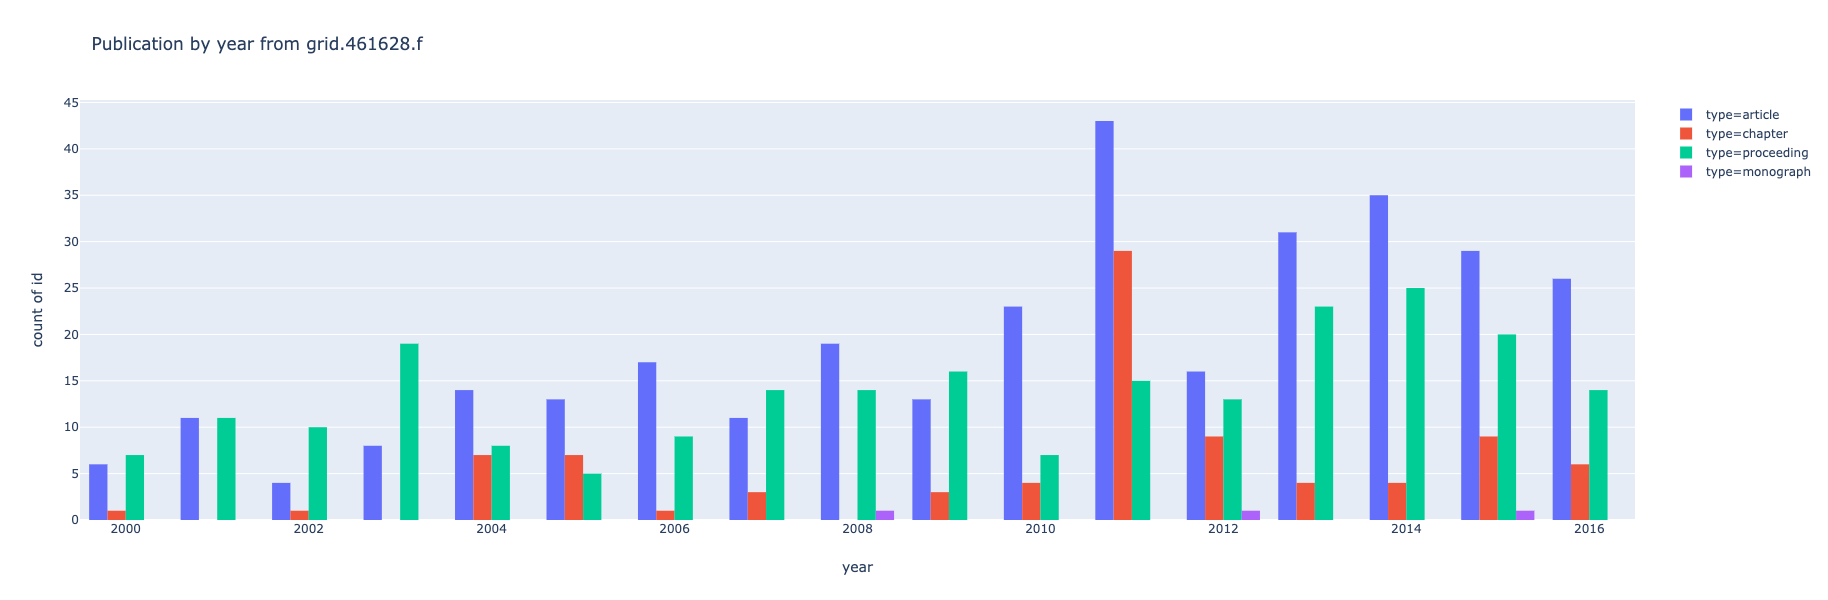

In [4]:
px.histogram(pubs, x="year", y="id", color="type", barmode="group", title=f"Publication by year from {GRIDID}")

### What are the main subject areas? 

We can use the Field of Research categories information in publications to obtain a breakdown of the publications by subject areas. 

This can be achieved by 'exploding' the `category_for` data into a separate table, since there can be more than one category per publication. The new categories table also retains some basic info about the publications it relates to eg *journal*, *title*, *publication id* etc.. so to make it easier to analyse the data. 

In [5]:
# ensure key exists in all rows (even if empty)
normalize_key("category_for", pubs_json.publications)
normalize_key("journal", pubs_json.publications)
# explode subjects into separate table
pubs_subjects = json_normalize(pubs_json.publications, record_path=['category_for'], 
                               meta=["id", "type", ["journal", "title"], "year"], 
                               errors='ignore', record_prefix='for_')
# add a new column: category name without digits for better readability 
pubs_subjects['topic'] = pubs_subjects['for_name'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

Now we can build a scatter plot that shows the amount and distribution of categories of the years.

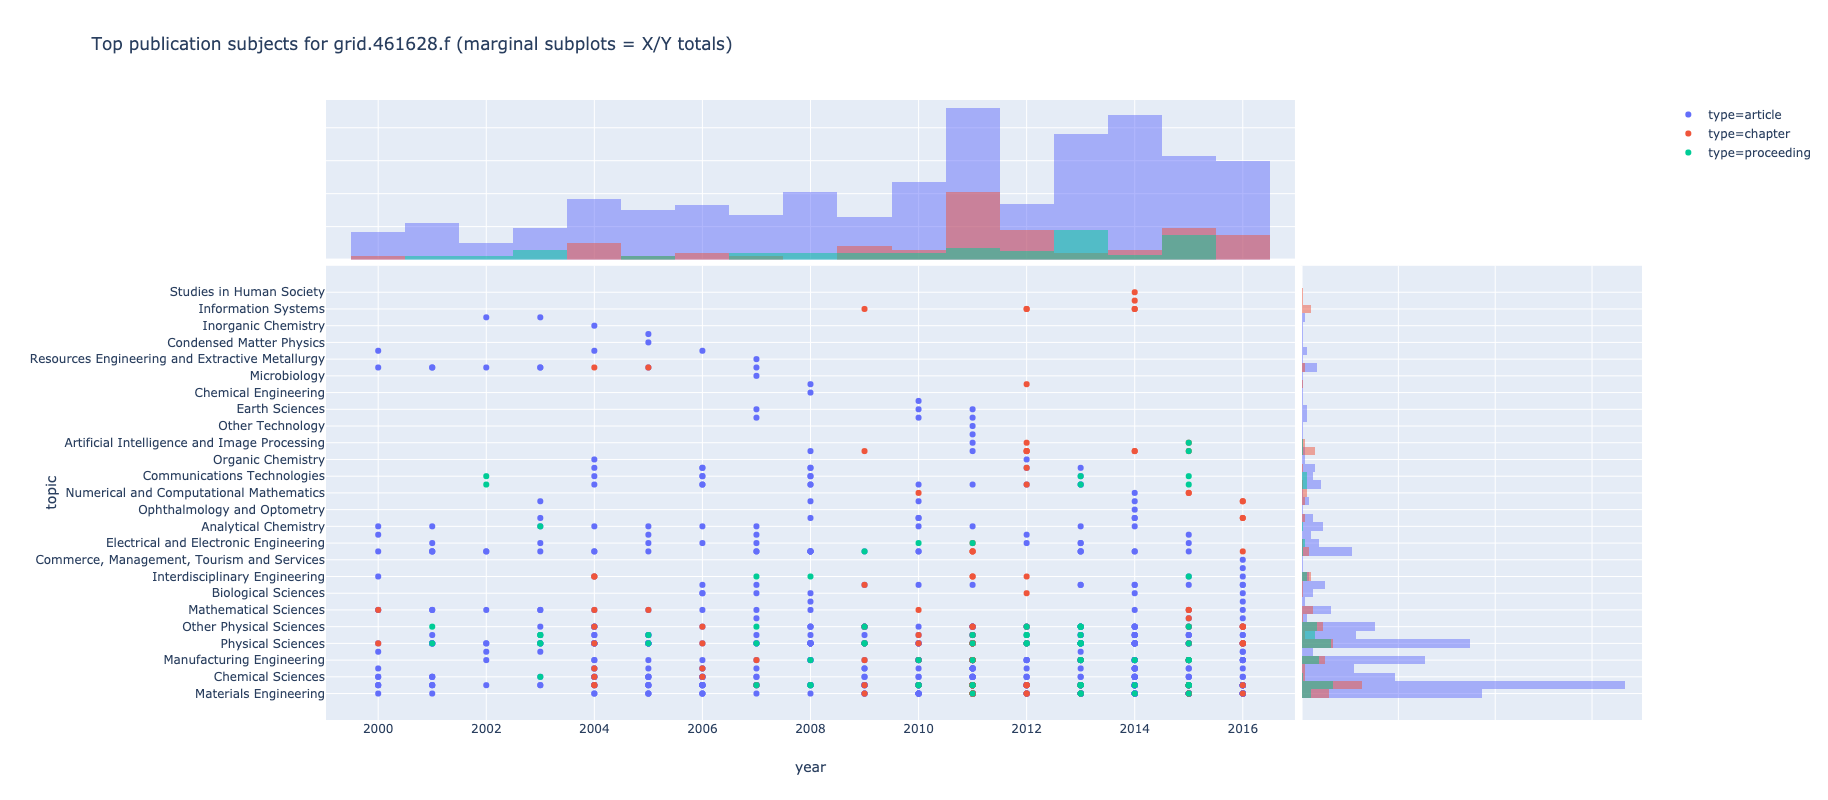

In [6]:
px.scatter(pubs_subjects, x="year", y="topic", color="type", 
           hover_name="for_name", 
           height=800,
           marginal_x="histogram", marginal_y="histogram", 
           title=f"Top publication subjects for {GRIDID} (marginal subplots = X/Y totals)")

## 2 - Extracting Patents linked to Publications

In this section we extract all patents linked to the publications dataset previously created. The steps are the following:

* we loop over the publication IDs and create patents queries, via the referencing `publication_ids` field of patents
* we collate all patens data, remove duplicates from patents and save the results 
* finally, we count patents per publication and enrich the original publication dataset with these numbers  

In [7]:
#
# the main query
#
q = """search patents where publication_ids in {} 
  return patents[basics+publication_ids+FOR]"""


#
# useful libraries for looping
#
from dimcli.shortcuts import chunks_of
from tqdm import tqdm_notebook as progressbar

#
# let's loop through all grants IDs in chunks and query Dimensions 
#
print("===\nExtracting patents data ...")
patents_json = []
BATCHSIZE = 400
VERBOSE = False # set to True to see patents extraction logs
pubsids = pubs['id']

for chunk in progressbar(list(chunks_of(list(pubsids), 400))):
    data = dsl.query_iterative(q.format(json.dumps(chunk)), verbose=VERBOSE)
    patents_json += data.patents
    time.sleep(1)
    

#
# put the patents data into a dataframe, remove duplicates and save
#
patents = pd.DataFrame().from_dict(patents_json)
print("Patents found: ", len(patents))
patents.drop_duplicates(subset='id', inplace=True)
print("Unique Patents found: ", len(patents))
# save
save_as_csv(patents, f"patents_{GRIDID}")
# turning lists into strings to ensure compatibility with CSV loaded data
# see also: https://stackoverflow.com/questions/23111990/pandas-dataframe-stored-list-as-string-how-to-convert-back-to-list
patents['publication_ids'] = patents['publication_ids'].apply(lambda x: ','.join(map(str, x))) 


#
# count patents per publication and enrich the original dataset
#
def patents_per_pub(pubid):
  global patents
  return patents[patents['publication_ids'].str.contains(pubid)]

print("===\nCounting patents per publication...")

l = []
for x in progressbar(pubsids):
  l.append(len(patents_per_pub(x)))

#
# enrich and save the publications data 
#
pubs['patents'] = l
save_as_csv(pubs, f"pubs_{GRIDID}_enriched_patents.csv")


===
Extracting patents data ...



Patents found:  166
Unique Patents found:  166
===
Saved:  extraction1/patents_grid.461628.f.csv
===
Counting patents per publication...



===
Saved:  extraction1/pubs_grid.461628.f_enriched_patents.csv.csv


### A quick look at the data

In [8]:
# display top 3 rows
patents.head(3)

times_cited                                              title  \
0            0  Metallic piece has an orientation of the defor...   
1            4  ALLOY CASTING MATERIAL AND METHOD FOR MANUFACT...   
2            1           Tapered core fiber manufacturing methods   

                                     publication_ids  year  \
0                                     pub.1028452564  2014   
1       pub.1053156744,pub.1002544046,pub.1049699601  2015   
2  pub.1061702966,pub.1065228094,pub.1061301157,p...  2012   

                                                 FOR             id  \
0  [{'id': '2921', 'name': '0912 Materials Engine...  FR-3026078-A1   
1  [{'id': '2921', 'name': '0912 Materials Engine...  EP-3026135-A1   
2  [{'id': '2921', 'name': '0912 Materials Engine...  US-9484706-B1   

                                      assignee_names  \
0  [Autotech Engineering AIE, AUTOTECH ENGINEERIN...   
1  [Industrial Technology Research Institute, IND...   
2  [nLight Inc, KOPONEN JOONA, PETIT LAETICIA, VÄ...   

                                      inventor_names filing_status  \
0  [CAZES CHRISTOPHE, GATARD GREGORY, HOLMBERG MA...   Application   
1  [CHOU, YU-HSIEN, YANG, CHIH-CHAO, HOU, YEN-YU,...   Application   
2  [Joona Koponen, Laeticia Petit, Petteri Väinänen]         Grant   

  publication_date                                          assignees  \
0       2016-03-25  [{'id': 'grid.476123.5', 'city_name': 'Alicant...   
1       2016-06-01  [{'id': 'grid.418030.e', 'city_name': 'Hsinchu...   
2       2016-11-01  [{'id': 'grid.431906.9', 'city_name': 'Vancouv...   

   granted_year  
0           NaN  
1           NaN  
2        2016.0

Publications now have patents info:

In [9]:
pubs.sort_values("patents", ascending=False).head(3)

title              id  \
629  Simulation of micro-channel heat sinks for opt...  pub.1051823674   
603  Laser Machining by short and ultrashort pulses...  pub.1027564391   
161  Numerical Computation of Component Shape Disto...  pub.1000912738   

                                   author_affiliations  times_cited  \
629  [[{'first_name': 'E.W', 'last_name': 'Kreutz',...           10   
603  [[{'first_name': 'J.', 'last_name': 'Meijer', ...          196   
161  [[{'first_name': 'L.', 'last_name': 'Papadakis...           34   

                                          category_for issue  year volume  \
629  [{'id': '2953', 'name': '0915 Interdisciplinar...  9-10  2000     31   
603  [{'id': '2209', 'name': '09 Engineering'}, {'i...     2  2002     51   
161  [{'id': '2353', 'name': '0103 Numerical and Co...  None  2014     18   

       pages     type    journal.id             journal.title  journal  \
629  787-790  article  jour.1029021  Microelectronics Journal      NaN   
603  531-550  article  jour.1137140               CIRP Annals      NaN   
161    90-95  article  jour.1137294             Procedia CIRP      NaN   

     patents  
629       30  
603       28  
161       16

## 3 - Patents Data Analysis

Now that we have extracted all the data we need, let's start exploring them by building a few visualizations. 

###  How many patents per year? 

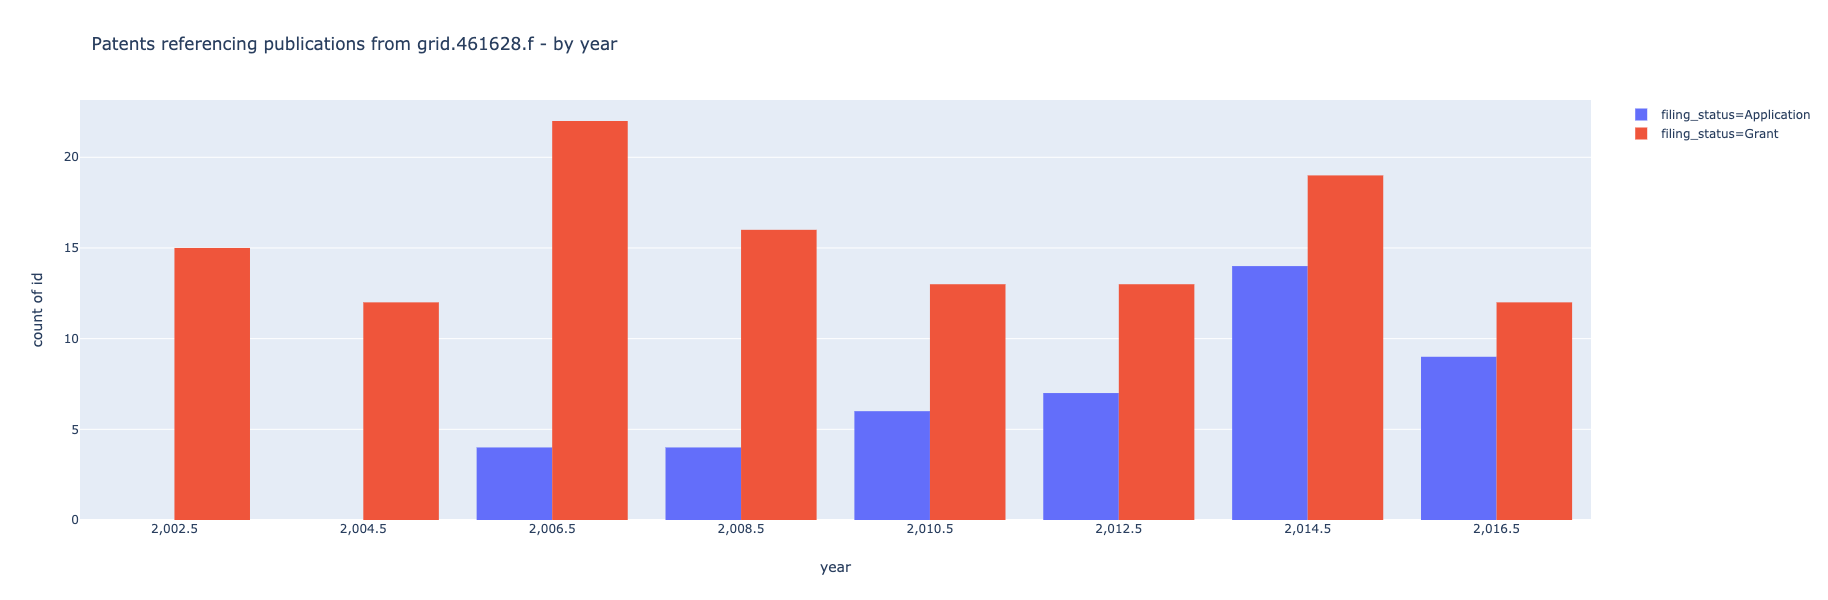

In [10]:
# PS is year correct as a patents field?
px.histogram(patents, x="year", y="id", color="filing_status", 
             barmode="group", 
             title=f"Patents referencing publications from {GRIDID} - by year")

### Who is filing the patents?

This can be done by looking at the field `assigness` of patent. Since the field contains nested information, first we need to extract it into its own table (similarly to what we've done above with publications categories). 

In [11]:
# ensure the key exists in all rows (even if empty) 
normalize_key('assignees', patents_json)
# explode assigness into separate table 
patents_assignees = json_normalize(patents_json, 
                                   record_path=['assignees'], 
                                   meta=['id', 'year', 'title'], 
                                   meta_prefix="patent_")

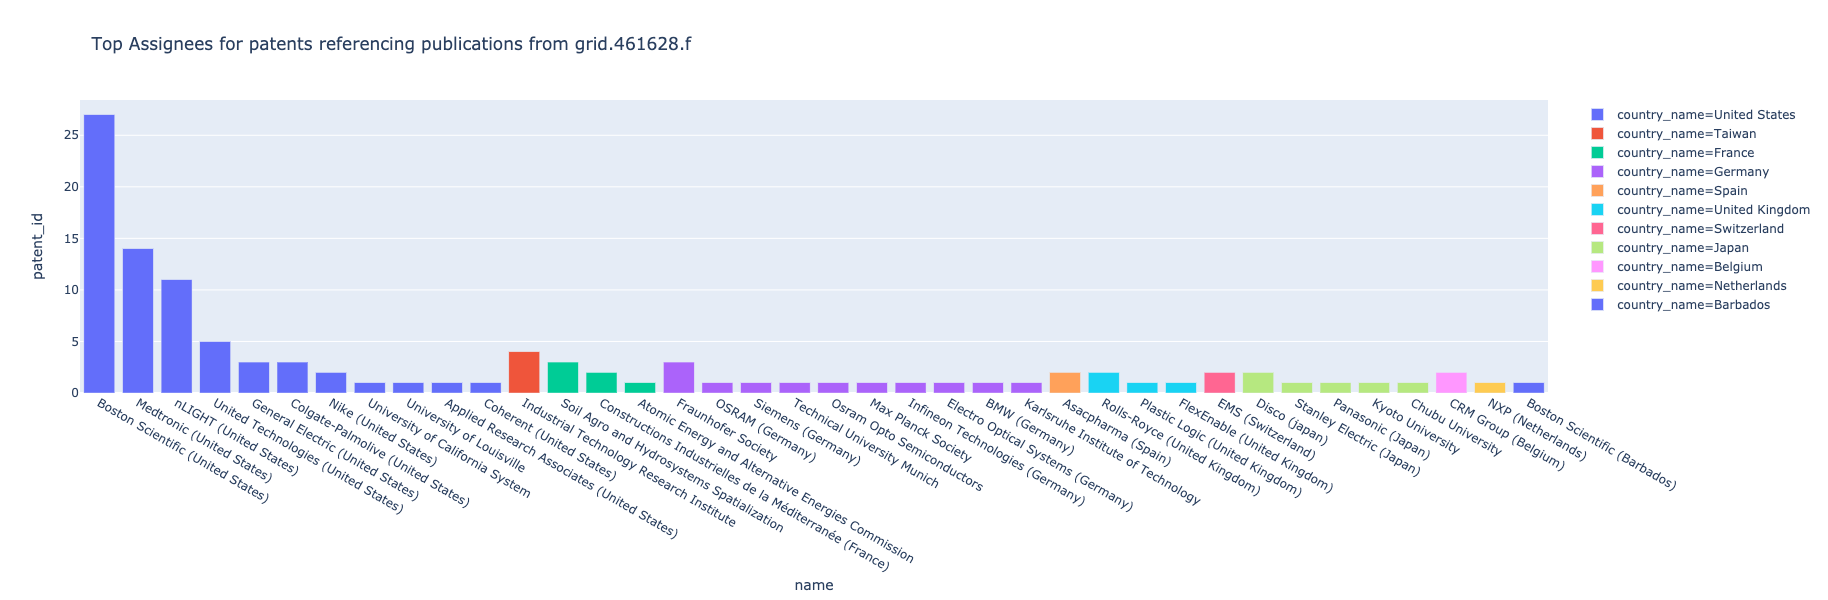

In [12]:
top_assignees = patents_assignees.groupby(['name', 'country_name'],  as_index=False).count().sort_values(by="patent_id", ascending=False)
px.bar(top_assignees, x="name", y="patent_id", 
       hover_name="name", color="country_name",
       title=f"Top Assignees for patents referencing publications from {GRIDID}")

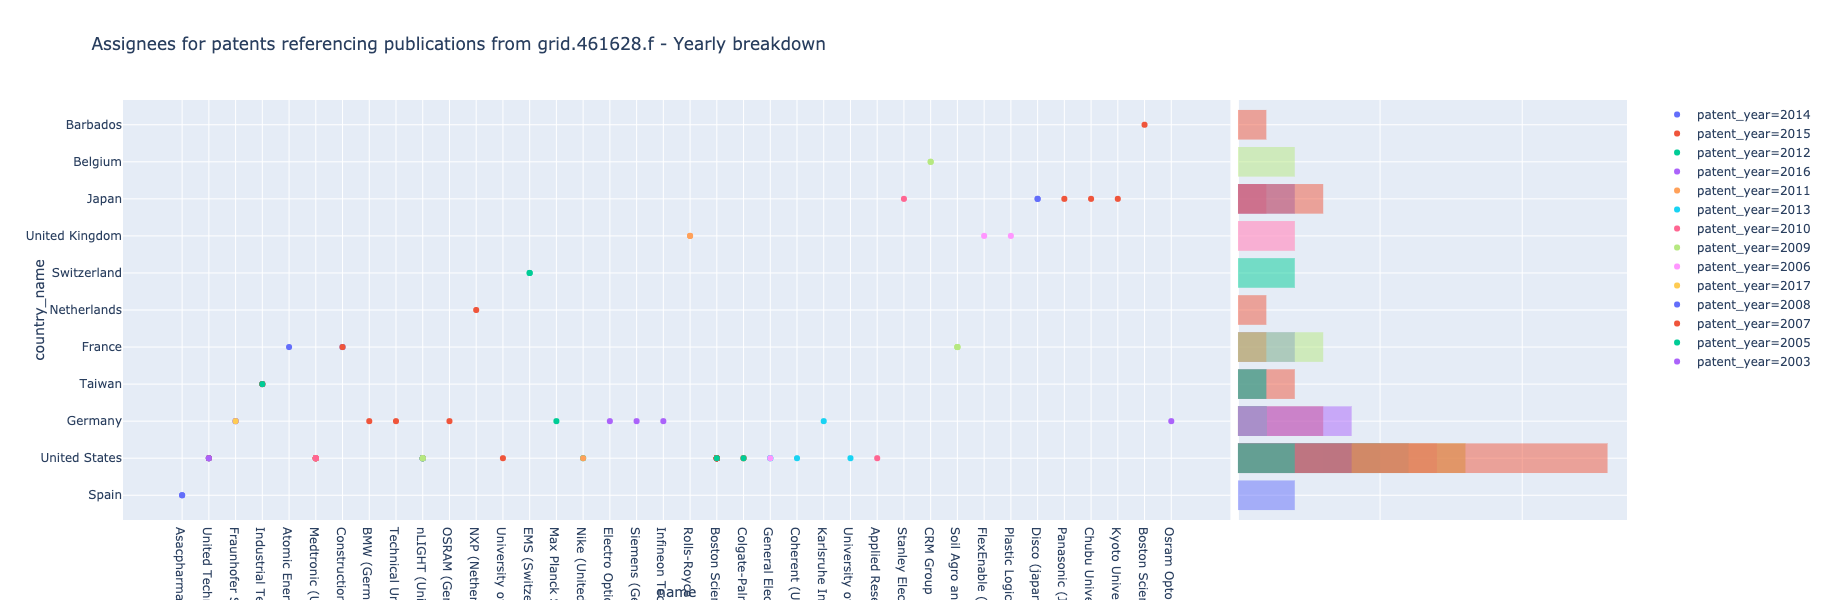

In [13]:
px.scatter(patents_assignees,  x="name", y="country_name", 
           color="patent_year", hover_name="name",  
           hover_data=["id", "patent_id"],  marginal_y="histogram",
           title=f"Assignees for patents referencing publications from {GRIDID} - Yearly breakdown")

### What are the publications most frequenlty referenced in patents?

In [14]:
pubs_cited = pubs.query("patents > 0 ").sort_values('patents', ascending=False).copy()
pubs_cited

title              id  \
629  Simulation of micro-channel heat sinks for opt...  pub.1051823674   
603  Laser Machining by short and ultrashort pulses...  pub.1027564391   
161  Numerical Computation of Component Shape Disto...  pub.1000912738   
393                 400W Yb:YAG Innoslab fs-Amplifier.  pub.1065190861   
609  Locally selective bonding of silicon and glass...  pub.1012452182   
421  Applications of laser transmission processes f...  pub.1006292747   
514  Online coating thickness measurement and depth...  pub.1042619448   
373                       Laser Additive Manufacturing  pub.1040299846   
382  Net shaped high performance oxide ceramic part...  pub.1014120524   
251  Local heat treatment of high strength steels w...  pub.1028452564   
454  Structural and mechanical evaluations of a top...  pub.1043695931   
590  Reduction of Bacillus Subtilis and Aspergillus...  pub.1061763546   
582          Laser bonding of micro-optical components  pub.1013365818   
329  Design of an Optical system for the In Situ Pr...  pub.1035892231   
575               Laser beam welding of thermoplastics  pub.1003631173   
490  New approach to online monitoring of the Al de...  pub.1033765774   
467  Novel high peak current pulsed diode laser sou...  pub.1018994077   
431        Laserdurchstrahlschweißen von Thermoplasten  pub.1005642888   
567  On-line detection of heavy metals and brominat...  pub.1065118550   
30   Enabling the measurement of particle sizes in ...  pub.1029716736   
350    Laser Assisted Joining of Plastic Metal Hybrids  pub.1020497622   
314  High Power Selective Laser Melting (HP SLM) of...  pub.1016766111   
300  Extending the process limits of laser polymer ...  pub.1047570431   
594  Laser welding of polymers using high-power dio...  pub.1003877975   
496  Structural, mechanical and in vitro characteri...  pub.1010750648   
498  Homogenization of high power diode laser beams...  pub.1015945371   
570  Slag Analysis with Laser-Induced Breakdown Spe...  pub.1065256326   
518  Integrating Philips' extreme UV source in the ...  pub.1013734479   
137  Post-processing of 3D-printed parts using femt...  pub.1042212091   
131  Local ultraviolet laser irradiation for gradie...  pub.1002113348   
195  Fluorescence sensors for parallel measurements...  pub.1039745879   
448  Ablative targeting of fatty‐tissue using a hig...  pub.1012600070   
221  Dicing of Thin Si Wafers with a Picosecond Las...  pub.1026312776   
424  Comparison of 1064 nm and 266 nm excitation of...  pub.1009998983   
116  Packaging for Power Semiconductors Based on th...  pub.1093812764   
142  Laser-induced breakdown spectroscopy expands i...  pub.1035117249   
328  Process Studies on Laser Welding of Copper wit...  pub.1000048024   
289  Ablation of PEDOT/PSS with excimer lasers for ...  pub.1014464305   
282          Self-optimizing assembly of laser systems  pub.1024547735   
272  Nanocrystalline TiC reinforced Ti matrix bulk-...  pub.1023812228   
252  Additive manufactured AlSi10Mg samples using S...  pub.1002544046   
439  Process Monitoring and Control of Laser Beam W...  pub.1001375658   

                                   author_affiliations  times_cited  \
629  [[{'first_name': 'E.W', 'last_name': 'Kreutz',...           10   
603  [[{'first_name': 'J.', 'last_name': 'Meijer', ...          196   
161  [[{'first_name': 'L.', 'last_name': 'Papadakis...           34   
393  [[{'first_name': 'P', 'last_name': 'Russbueldt...          111   
609  [[{'first_name': 'M.J.', 'last_name': 'Wild', ...           61   
421  [[{'first_name': 'F.', 'last_name': 'Sari', 'c...           12   
514  [[{'first_name': 'H.', 'last_name': 'Balzer', ...           36   
373  [[{'first_name': 'Andres', 'last_name': 'Gasse...           51   
382  [[{'first_name': 'Hagedorn', 'last_name': 'Yve...          108   
251  [[{'first_name': 'Markus', 'last_name': 'Bauma...            5   
454  [[{'first_name': 'Chia‐Ying', 'last_name': 'Li...          107   
590  [[{'first

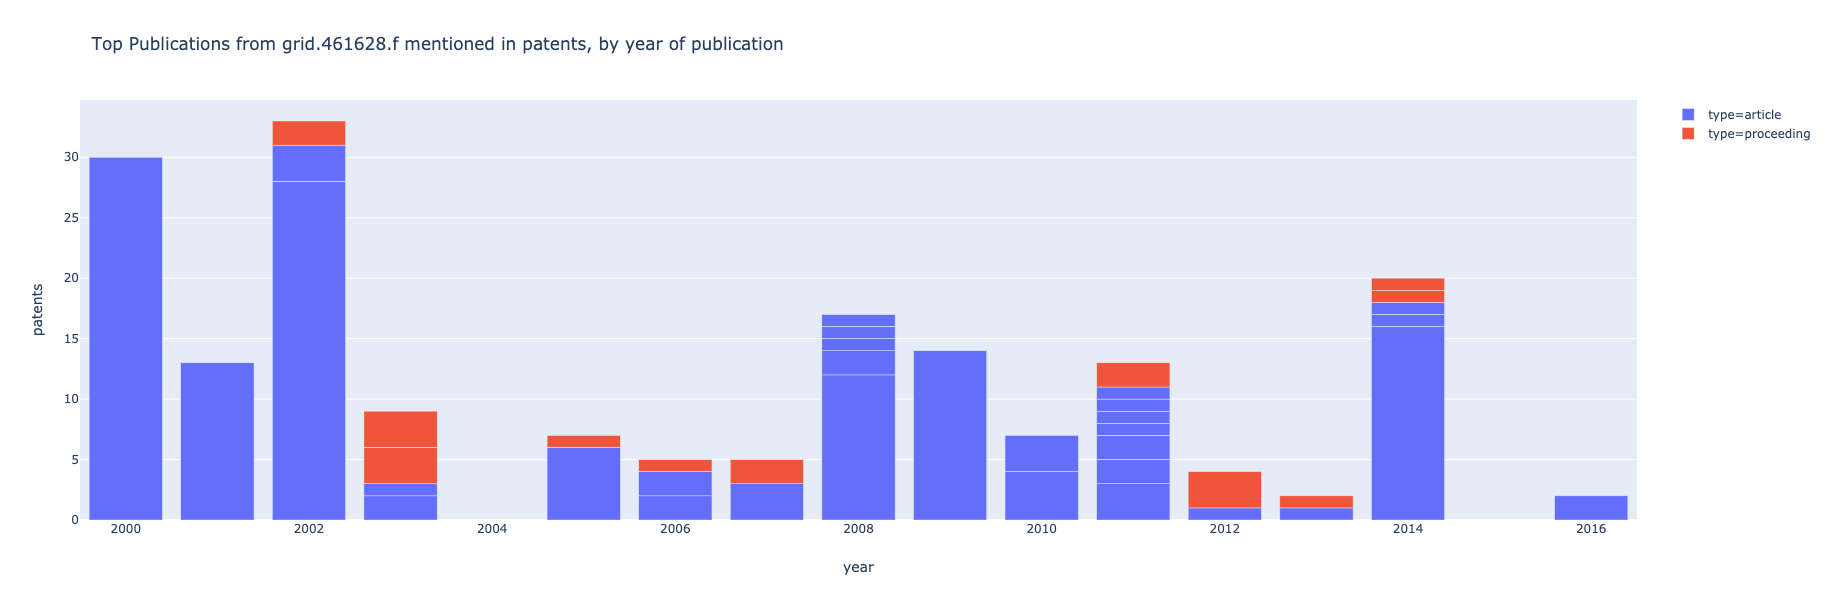

In [15]:
px.bar(pubs_cited[:1000], color="type",
       x="year", y="patents", 
       hover_name="title",  hover_data=["journal.title"],
       title=f"Top Publications from {GRIDID} mentioned in patents, by year of publication")

### What are the main subject areas of referenced publications?

In [16]:
THRESHOLD_PUBS = 1000
citedids = list(pubs_cited[:THRESHOLD_PUBS]['id'])
pubs_subjects_cited = pubs_subjects[pubs_subjects['id'].isin(citedids)]

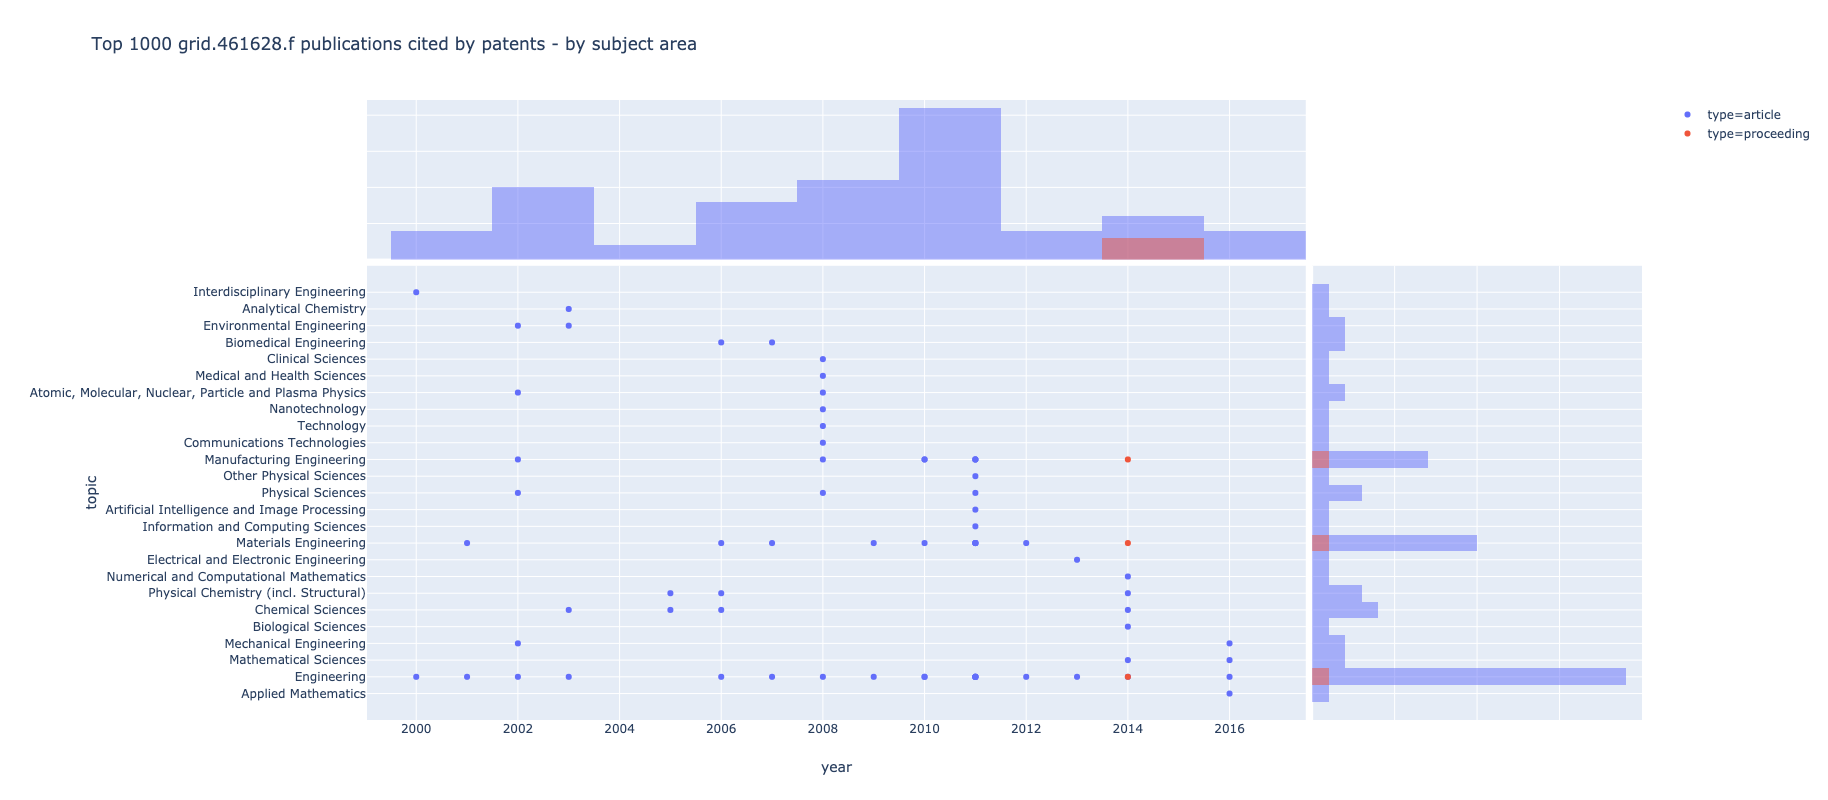

In [17]:
px.scatter(pubs_subjects_cited, x="year", y="topic", color="type", 
           hover_name="for_name", 
           height=800,
           marginal_x="histogram", marginal_y="histogram", 
           title=f"Top {THRESHOLD_PUBS} {GRIDID} publications cited by patents - by subject area")

### Is there a correlation from publication citations to patents citations? 

Note: if the points on a scatterplot graph produce a lower-left-to-upper-right pattern (see below), that is indicative of a positive correlation between the two variables. This pattern means that when the score of one observation is high, we expect the score of the other observation to be high as well, and vice versa.

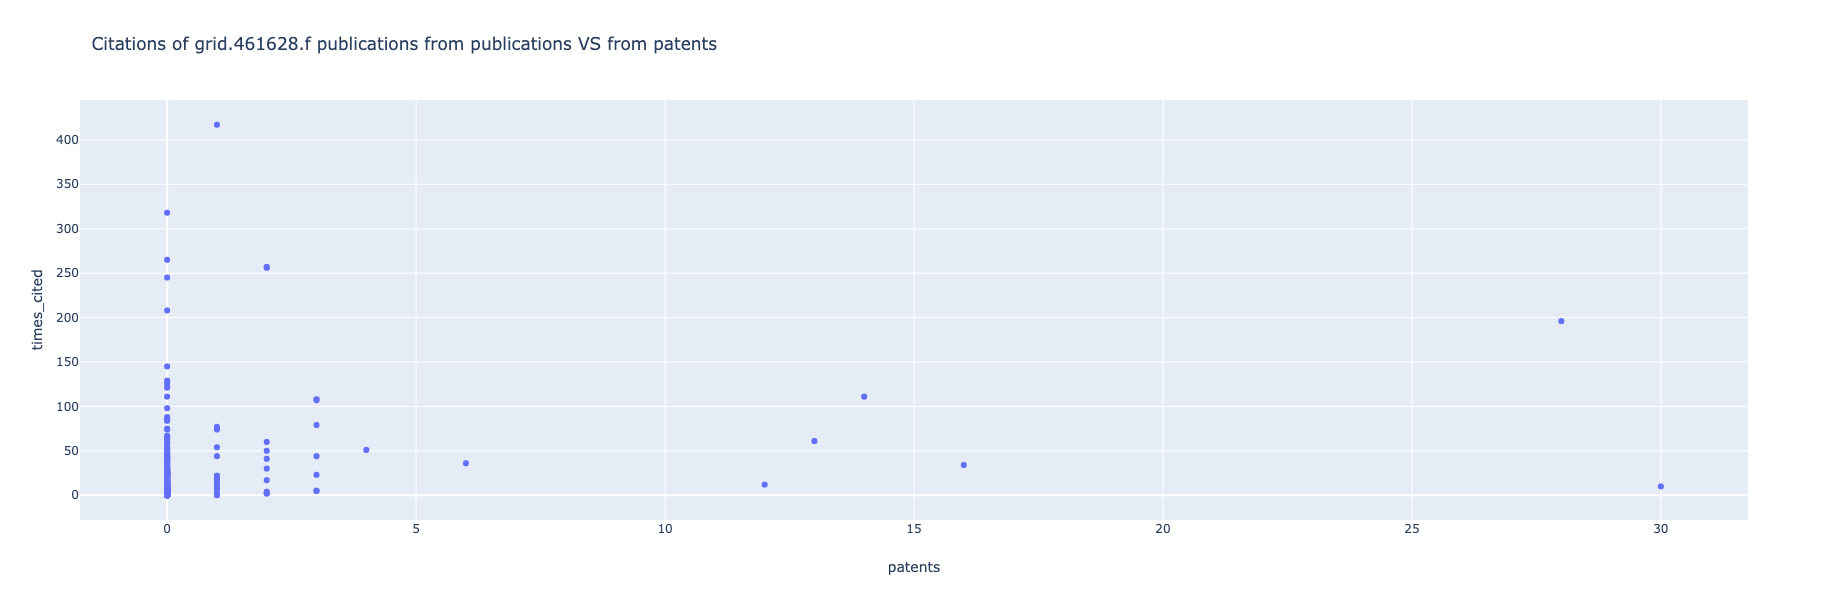

In [18]:
px.scatter(pubs, x="patents", y="times_cited", 
           title=f"Citations of {GRIDID} publications from publications VS from patents")

---
## Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 